<a href="https://colab.research.google.com/github/abdeljalilHajjaj/PandasTraining/blob/main/PandasTraining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [85]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import date
import seaborn as sns



In [86]:
!pip install lxml

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [87]:
new_col_names = ['MangaName','Author(s)','publisher','type','Collecte_volumes','serialized','sum_of_sales_By_million','average_sales_By_million']
table = pd.read_html('https://en.wikipedia.org/wiki/List_of_best-selling_manga')

In [88]:
table[1].columns = new_col_names
table[2].columns = new_col_names
table[3].columns = new_col_names
table[4].columns = new_col_names

In [89]:
frames = [table[1],table[2],table[3],table[4]]
table_final = pd.concat(frames,ignore_index=True)

In [90]:
table_final

,MangaName,Author(s),publisher,type,Collecte_volumes,serialized,sum_of_sales_By_million,average_sales_By_million
0,One Piece,Eiichiro Oda,Shueisha,Shōnen,104,1997–present,516.6 million[2][d],4.97 million
1,Golgo 13,"Takao Saito, Saito Production",Shogakukan,Seinen,207,1968–present,300 million[3],1.45 million
2,Case Closed / Detective Conan,Gosho Aoyama,Shogakukan,Shōnen,102,1994–present,270 million[4],2.65 million
3,Dragon Ball,Akira Toriyama,Shueisha,Shōnen,42,1984–1995,260 million[5][e][f],6.19 million
4,Doraemon,Fujiko F. Fujio,Shogakukan,Children,45,1969–1996,250 million[18][g],4.71 million
...,...,...,...,...,...,...,...,...
181,Sukeban Deka,Shinji Wada,Hakusensha,Shōjo,22,1976–1982,20 million[183],0.90 million
182,Swan,Kyoko Ariyoshi,Shueisha,Shōjo,21,1976–1981,20 million[184],0.95 million
183,The Tale of Genji,Waki Yamato,Kodansha,Shōjo,13,1980–1993,20 million[185],1.53 million
184,Tokyo Daigaku Monogatari,Tatsuya Egawa,Shogakukan,Seinen,34,1992–2001,20 million[186],0.58 million


In [91]:
table_final[['start_date','end_date']] = table_final.serialized.str.split("–",n=1,expand=True)

In [92]:
table_final.pop('serialized')
table_final.pop('average_sales_By_million');

In [93]:
table_final.sum_of_sales_By_million = table_final.sum_of_sales_By_million.str.replace('million.*',"")

<ipython-input-93-3de366c36a8c>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  table_final.sum_of_sales_By_million = table_final.sum_of_sales_By_million.str.replace('million.*',"")


In [94]:
table_final.loc[75,'Collecte_volumes'] = 35 
table_final.loc[31,'Collecte_volumes'] = 22 

In [95]:

table_final.sum_of_sales_By_million = table_final.sum_of_sales_By_million.astype('float64')
table_final.Collecte_volumes = table_final.Collecte_volumes.astype('int64')
table_final.MangaName = table_final.MangaName.astype('string')

In [96]:
for i,j in enumerate(table_final.end_date):
  if j=='present' :
    table_final.loc[i,'end_date'] = date.today().year
  if '(on hiatus)' in j:
    table_final.loc[i,'end_date'] = table_final.loc[i,'end_date'].replace('(on hiatus)','')

In [97]:
table_final.loc[table_final.end_date=="1987, 2011–present",'end_date'] = date.today().year

In [98]:
table_final['statut'] = ['ended' if str(x) < str(date.today().year) else 'in progress' for x in table_final['end_date'] ]

In [99]:
table_final

,MangaName,Author(s),publisher,type,Collecte_volumes,sum_of_sales_By_million,start_date,end_date,statut
0,One Piece,Eiichiro Oda,Shueisha,Shōnen,104,516.6,1997,2023,in progress
1,Golgo 13,"Takao Saito, Saito Production",Shogakukan,Seinen,207,300.0,1968,2023,in progress
2,Case Closed / Detective Conan,Gosho Aoyama,Shogakukan,Shōnen,102,270.0,1994,2023,in progress
3,Dragon Ball,Akira Toriyama,Shueisha,Shōnen,42,260.0,1984,1995,ended
4,Doraemon,Fujiko F. Fujio,Shogakukan,Children,45,250.0,1969,1996,ended
...,...,...,...,...,...,...,...,...,...
181,Sukeban Deka,Shinji Wada,Hakusensha,Shōjo,22,20.0,1976,1982,ended
182,Swan,Kyoko Ariyoshi,Shueisha,Shōjo,21,20.0,1976,1981,ended
183,The Tale of Genji,Waki Yamato,Kodansha,Shōjo,13,20.0,1980,1993,ended
184,Tokyo Daigaku Monogatari,Tatsuya Egawa,Shogakukan,Seinen,34,20.0,1992,2001,ended


In [100]:
top_type = table_final.groupby('type')['MangaName'].count()

In [101]:
frame = { 'nbManga': top_type, 'typeManga': top_type.index }
tyy = pd.DataFrame(frame)
top_type =  tyy.reset_index(drop=True)

In [102]:
sort = top_type.sort_values('nbManga',ascending=False).query("typeManga != '—'")

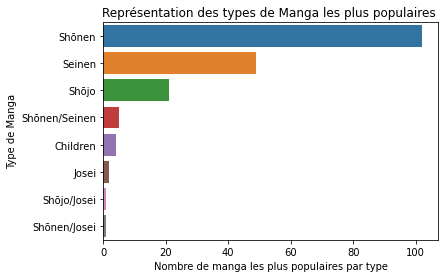

In [103]:
sns.barplot(y='typeManga',x='nbManga',data=sort)
plt.title('Représentation des types de Manga les plus populaires ')
plt.ylabel('Type de Manga')
plt.xlabel('Nombre de manga les plus populaires par type')
plt.show()


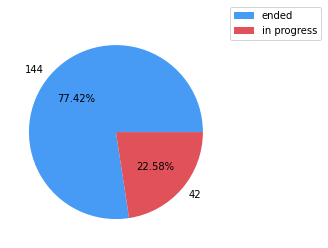

In [122]:
colors = ['#479BF5', '#E05159']
tr = table_final.groupby('statut')['MangaName'].count()
tr.index
plt.pie(tr,labels=tr,colors=colors,autopct='%.2f%%')
plt.legend(tr.index,loc='upper left',bbox_to_anchor=(1, 1.10))
plt.show()

In [105]:
top_manga = table_final[:10] 

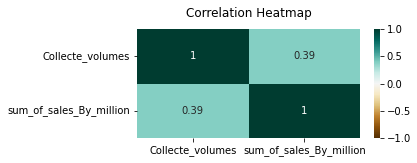

In [106]:

plt.figure(figsize=(5, 2))
heatmap = sns.heatmap(table_final.corr(), vmin=-1, vmax=1, annot=True,cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

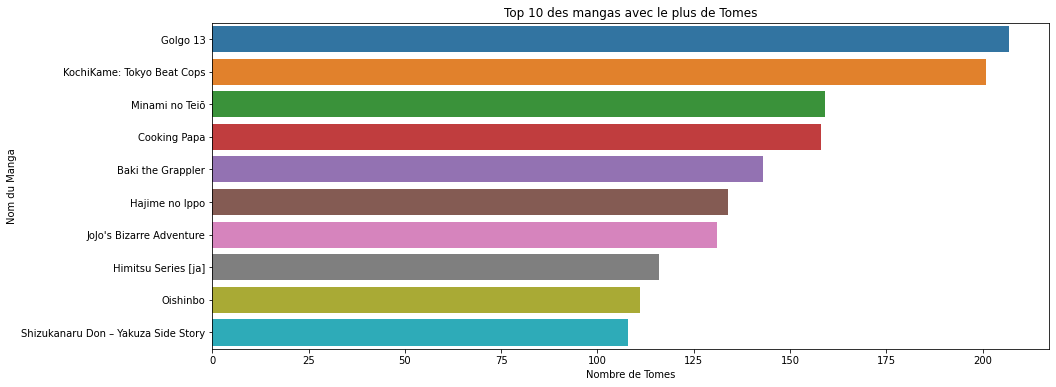

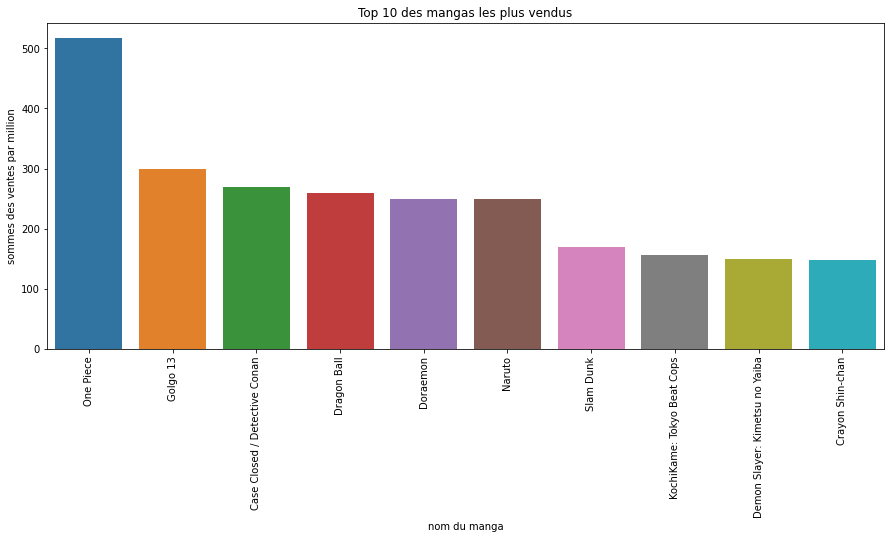

In [107]:

top_vol = table_final.sort_values('Collecte_volumes',ascending=False)[:10]
fig, axe = plt.subplots(figsize=(15, 6))
sns.barplot(x=top_vol['Collecte_volumes'],y=top_vol['MangaName'],data=top_vol,ax=axe)
plt.title('Top 10 des mangas avec le plus de Tomes')
plt.xlabel('Nombre de Tomes')
plt.ylabel('Nom du Manga')

plt.show()
fig, axe = plt.subplots(figsize=(15, 6))
sns.barplot(data=top_manga,x='MangaName',y='sum_of_sales_By_million',ax=axe)
plt.ylabel('sommes des ventes par million')
plt.xlabel('nom du manga')
plt.title('Top 10 des mangas les plus vendus')
plt.xticks(rotation=90);
plt.show()